###SECCIÓN 1: CONFIGURACIÓN E IMPORTACIÓN DE LIBRERÍAS

En esta primera sección, importamos todas las librerías de Python que necesitaremos para nuestro análisis. Estas incluyen pandas para la manipulación de datos, numpy para operaciones numéricas, matplotlib y seaborn para visualizaciones, y varios módulos de scikit-learn para el preprocesamiento, modelado e interpretación.

In [44]:
# Importación de librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades de Scikit-learn para modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Módulo de Scikit-learn para PDP e ICE
from sklearn.inspection import PartialDependenceDisplay

# Configuraciones adicionales para mejorar la visualización
plt.style.use('seaborn-v0_8-whitegrid') # Estilo visual para los gráficos
import warnings
warnings.filterwarnings('ignore') # Ignorar advertencias para una salida más limpia


print("Librerías importadas correctamente.")

Librerías importadas correctamente.


###SECCIÓN 2: CARGA Y EXPLORACIÓN INICIAL DE DATOS

Cargaremos el dataset White-wine.csv. Como las primeras líneas contienen metadatos, las omitiremos. La primera fila válida contiene los nombres de las columnas, teniendo como separador la coma.

Realizaremos una exploración inicial para entender la estructura y características del dataset.

Intentando cargar el dataset desde: https://raw.githubusercontent.com/jaxlvl/Exploring-ICE-PDP/main/DataBases/White-wine-quality.csv
Dataset cargado correctamente.
Dimensiones del dataset: (4898, 12)

--- Primeras 5 filas del Dataset ---
   quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        6            7.0              0.27         0.36            20.7   
1        6            6.3              0.30         0.34             1.6   
2        6            8.1              0.28         0.40             6.9   
3        6            7.2              0.23         0.32             8.5   
4        6            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.

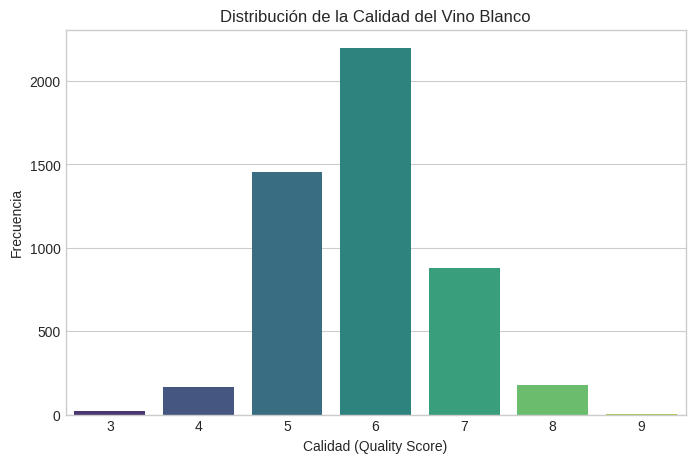

In [45]:
# --- Carga de Datos desde GitHub ---
# URL del archivo CSV en formato "raw" de tu repositorio de GitHub,
# añadimos raw.githubusercontent.com para que pueda ser accedido directamente

github_raw_url = 'https://raw.githubusercontent.com/jaxlvl/Exploring-ICE-PDP/main/DataBases/White-wine-quality.csv'

print(f"Intentando cargar el dataset desde: {github_raw_url}")

try:
    # La primera fila (índice 0) del CSV es el encabezado correcto.
    # Las filas en los índices 1 y 2 del archivo CSV
    # contienen metadatos, por lo que las omitiremos con skiprows[1,2]

    df_wine = pd.read_csv(github_raw_url, sep=',', header=0, skiprows=[1, 2])
    print(f"Dataset cargado correctamente.")
    print(f"Dimensiones del dataset: {df_wine.shape}")

except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Por favor, verifica la URL y asegúrate de que el archivo exista.")
    df_wine = pd.DataFrame() # DataFrame vacío para permitir la revisión del resto del script

if not df_wine.empty:
    # --- Exploración Inicial de Datos ---
    print("\n--- Primeras 5 filas del Dataset ---")
    print(df_wine.head())

    print("\n--- Información del Dataset ---")
    df_wine.info()
    # Como observamos, todas las columnas, incluyendo 'quality' (nuestro target),
    # se cargan como float64 o int64, indicando que son numéricas.
    # 'quality' será nuestra variable objetivo para regresión.

    print("\n--- Estadísticas Descriptivas ---")
    print(df_wine.describe())

    # Visualizar la distribución de la variable objetivo 'quality'
    plt.figure(figsize=(8, 5))
    sns.countplot(x='quality', data=df_wine, palette='viridis')
    plt.title('Distribución de la Calidad del Vino Blanco')
    plt.xlabel('Calidad (Quality Score)')
    plt.ylabel('Frecuencia')
    plt.show()

else:
    print("El DataFrame está vacío. No se puede continuar con la exploración y el modelado.")

###SECCIÓN 3: PREPARACIÓN DE DATOS PARA EL MODELADO

Definiremos nuestras variables predictoras (X) y la variable objetivo (y). Dado que todas las características predictoras ya son numéricas, el preprocesamiento es más directo en este caso en comparación con datasets con variables categóricas. Luego, dividiremos los datos en conjuntos de entrenamiento y prueba.

In [46]:
if not df_wine.empty:
    # --- Definición de Características y Objetivo ---
    X = df_wine.drop('quality', axis=1) # Todas las columnas excepto 'quality' son predictoras
    y = df_wine['quality']             # 'quality' es la variable objetivo

    print("\n--- Características (X) ---")
    print(X.head())
    print(f"Dimensiones de X: {X.shape}")

    print("\n--- Variable Objetivo (y) ---")
    print(y.head())
    print(f"Dimensiones de y: {y.shape}")

    # --- División en Conjuntos de Entrenamiento y Prueba ---
    # Usamos random_state para asegurar que los resultados sean reproducibles.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    print(f"\nDimensiones de X_train: {X_train.shape}, X_test: {X_test.shape}")
    print(f"Dimensiones de y_train: {y_train.shape}, y_test: {y_test.shape}")
else:
    print("No se pudieron cargar los datos, las siguientes secciones no se ejecutarán.")


--- Características (X) ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3    

###SECCIÓN 4: ENTRENAMIENTO DE MODELOS

Entrenaremos dos modelos de regresión para predecir la calidad del vino: un Árbol de Decisión y un Random Forest. Estos modelos nos permitirán comparar cómo los gráficos PDP e ICE se manifiestan en un modelo simple vs. uno más complejo.

In [47]:
if not df_wine.empty:
    # --- Modelo 1: Árbol de Decisión Regresor ---
    # Limitamos la profundidad para una mejor interpretabilidad inicial y para ver PDPs escalonados.
    dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
    dt_regressor.fit(X_train, y_train)
    print("\nModelo Árbol de Decisión entrenado.")

    # --- Modelo 2: Random Forest Regresor ---
    # Un modelo más complejo, que puede capturar interacciones y no linealidades.
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_leaf=5)
    rf_regressor.fit(X_train, y_train)
    print("Modelo Random Forest entrenado.")

    # --- Evaluación Breve de los Modelos ---
    y_pred_dt = dt_regressor.predict(X_test)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    print(f"MSE del Árbol de Decisión: {mse_dt:.3f}")

    y_pred_rf = rf_regressor.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    print(f"MSE del Random Forest: {mse_rf:.3f}")
else:
    print("Saltando entrenamiento de modelos debido a la falta de datos.")


Modelo Árbol de Decisión entrenado.
Modelo Random Forest entrenado.
MSE del Árbol de Decisión: 0.548
MSE del Random Forest: 0.422


###SECCIÓN 5: ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS

Utilizaremos el modelo Random Forest para estimar la importancia de cada característica. Esto nos ayudará a seleccionar las variables más influyentes para un análisis más detallado con PDP e ICE.

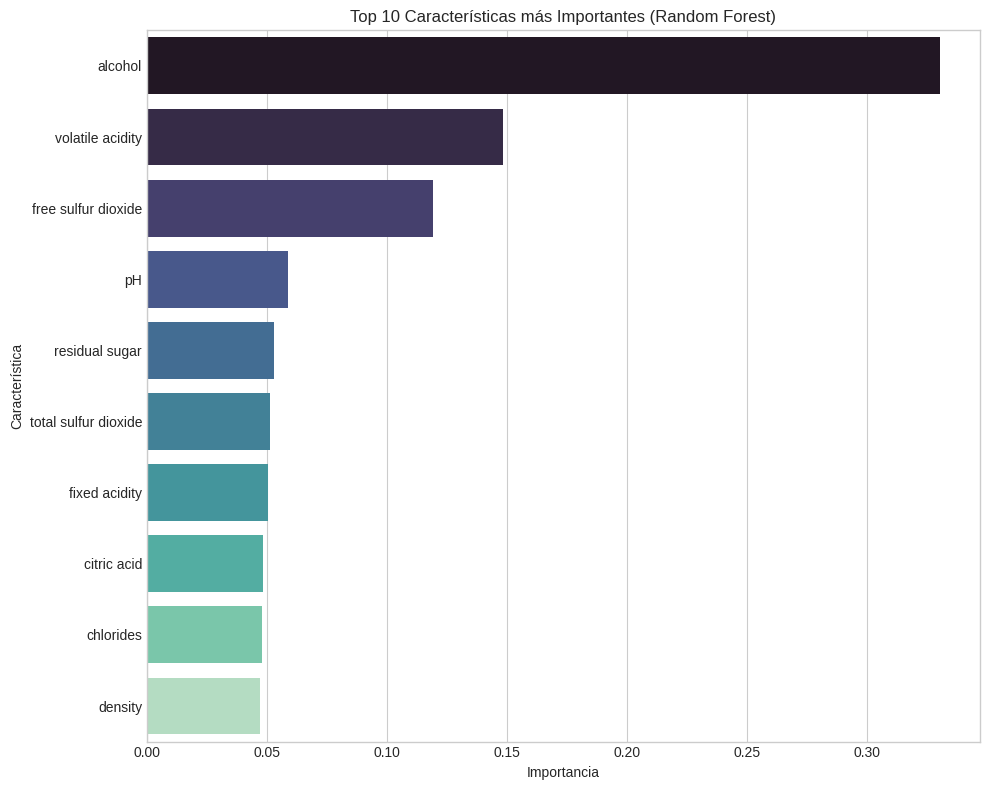

In [48]:
if not df_wine.empty and 'rf_regressor' in locals():
    importances = rf_regressor.feature_importances_
    feature_names = X_train.columns

    # Crear un DataFrame para visualizar las importancias
    df_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
    df_importances = df_importances.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=df_importances.head(10), palette='mako') # Top 10
    plt.title('Top 10 Características más Importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

    # Guardamos las características más importantes para el análisis PDP/ICE
    important_features = df_importances['feature'].tolist()
else:
    print("Saltando análisis de importancia de características.")
    important_features = [] # Lista vacía si no se pueden calcular

###SECCIÓN 6: SELECCIÓN DE CARACTERÍSTICAS PARA PDP/ICE

Basándonos en la importancia y en el potencial para mostrar efectos interesantes, seleccionaremos unas pocas características clave.

El objetivo no es ser exhaustivo, sino demostrativo.

In [49]:
if not df_wine.empty and important_features:
    # Seleccionamos, por ejemplo, las 3-4 características numéricas más importantes
    # y algunos pares para interacciones.

    # Características para análisis 1D (PDP, ICE, c-ICE)
    # Tomamos las top 4 de la lista de importancia
    features_for_1D_analysis = [feat for feat in important_features[:4] if feat in X_train.columns]
    print(f"\nCaracterísticas seleccionadas para análisis 1D PDP/ICE: {features_for_1D_analysis}")

    # Pares de características para análisis 2D PDP (interacciones)
    # Importante seleccionar pares que sean importantes y/o que sospechemos que puedeninteractuar.
    # Ejemplo: 'alcohol' y 'volatile acidity', y 'alcohol' y 'residual sugar'
    feature_pairs_for_2D_analysis = []
    if 'alcohol' in X_train.columns and 'volatile acidity' in X_train.columns:
        feature_pairs_for_2D_analysis.append(('alcohol', 'volatile acidity'))
    if 'alcohol' in X_train.columns and 'density' in X_train.columns:
         feature_pairs_for_2D_analysis.append(('alcohol', 'density'))
    if 'residual sugar' in X_train.columns and 'alcohol' in X_train.columns:
         feature_pairs_for_2D_analysis.append(('residual sugar', 'alcohol'))

    # Si no hay suficientes características importantes o no se encontraron los pares específicos:
    if not feature_pairs_for_2D_analysis and len(X_train.columns) >= 2:
        feature_pairs_for_2D_analysis.append((X_train.columns[0], X_train.columns[1])) # Fallback a las dos primeras

    print(f"Pares de características para análisis 2D PDP: {feature_pairs_for_2D_analysis}")

else:
    print("No se pueden seleccionar características para PDP/ICE debido a falta de datos o importancias.")
    features_for_1D_analysis = []
    feature_pairs_for_2D_analysis = []


Características seleccionadas para análisis 1D PDP/ICE: ['alcohol', 'volatile acidity', 'free sulfur dioxide', 'pH']
Pares de características para análisis 2D PDP: [('alcohol', 'volatile acidity'), ('alcohol', 'density'), ('residual sugar', 'alcohol')]


###SECCIÓN 7: GENERACIÓN E INTERPRETACIÓN DE GRÁFICOS PDP E ICE

Ahora generaremos los gráficos. Las funciones auxiliares nos ayudarán a visualizar PDP, ICE, c-ICE para las características seleccionadas y PDP 2D para los pares.

In [50]:
# --- Funciones Auxiliares para Graficar ---
def plot_pdp_ice_cice_wine(model, X_data, feature_name, title_suffix="", kind='average'):
    if feature_name not in X_data.columns:
        print(f"Advertencia: Característica '{feature_name}' no encontrada en X_data. Omitiendo gráfico.")
        return

    fig, ax = plt.subplots(figsize=(12, 7)) # Ajuste de tamaño
    common_params = {"estimator": model, "X": X_data, "features": [feature_name], "ax": ax, "random_state": 42}
    plot_title = f'Para "{feature_name}"\n{title_suffix}'
    ylabel_text = 'Predicción de Calidad (Quality)'

    if kind == 'pdp':
        PartialDependenceDisplay.from_estimator(**common_params, kind='average')
        plt.title(f'PDP {plot_title}')

    elif kind == 'ice':
        PartialDependenceDisplay.from_estimator(**common_params, kind='individual', subsample=min(100, X_data.shape[0]),
                                                line_kw={'alpha': 0.3}) # Alfa para mejor visualización de líneas
        plt.title(f'ICE {plot_title}')

    elif kind == 'both':
        PartialDependenceDisplay.from_estimator(**common_params, kind='both', subsample=min(100, X_data.shape[0]),
                                                pd_line_kw={'color': 'red', 'linestyle': '--', 'linewidth': 2.5, 'label': 'PDP'},
                                                line_kw={'alpha': 0.2}) # Alfa para líneas ICE
        plt.title(f'ICE y PDP {plot_title}')
        ax.legend()

    elif kind == 'c-ice':
        PartialDependenceDisplay.from_estimator(**common_params, kind='both', centered=True, subsample=min(100, X_data.shape[0]),
                                                pd_line_kw={'color': 'red', 'linestyle': '--', 'linewidth': 2.5, 'label': 'PDP'},
                                                line_kw={'alpha': 0.3})
        plt.title(f'c-ICE (Centrados) {plot_title}')
        ylabel_text = 'Cambio en Calidad (predicción centrada)' # El eje Y cambia con 'centered=True'
        ax.legend()

    else:
        print(f"Tipo de gráfico '{kind}' no reconocido.")
        return

    plt.xlabel(f'Valor de {feature_name}')
    plt.ylabel(ylabel_text)
    plt.grid(True); plt.tight_layout(); plt.show()

def plot_pdp_2d_wine(model, X_data, feature_pair, title_suffix=""):
    if not (feature_pair[0] in X_data.columns and feature_pair[1] in X_data.columns):
        print(f"Advertencia: Par '{feature_pair}' no encontrado. Omitiendo gráfico 2D.")
        return

    fig, ax = plt.subplots(figsize=(10, 8))
    PartialDependenceDisplay.from_estimator(estimator=model, X=X_data, features=[feature_pair], ax=ax, random_state=42)
    plt.title(f'PDP 2D para "{feature_pair[0]}" y "{feature_pair[1]}"\n{title_suffix}')
    plt.tight_layout()
    plt.show()


#### --- 7.1 Análisis para el Árbol de Decisión ---


ANÁLISIS PDP/ICE PARA ÁRBOL DE DECISIÓN (Vino Blanco)
Se esperan gráficos PDP/ICE escalonados, reflejando las reglas de división del árbol.

--- Árbol de Decisión: Analizando 'alcohol' ---


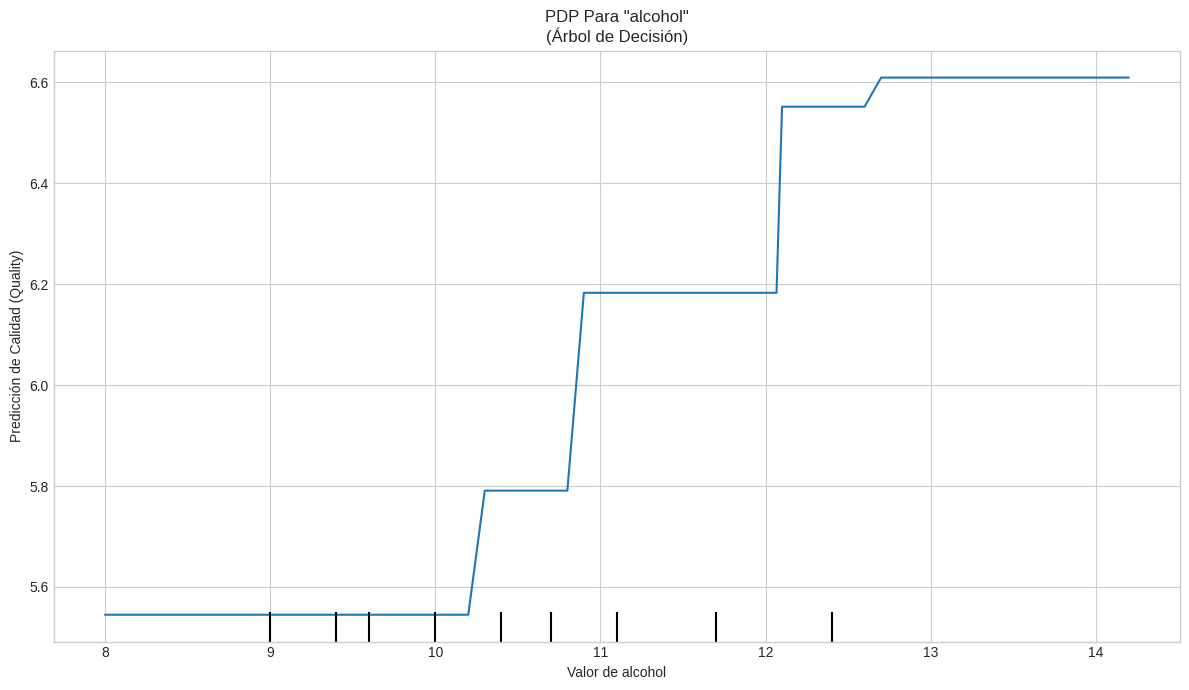

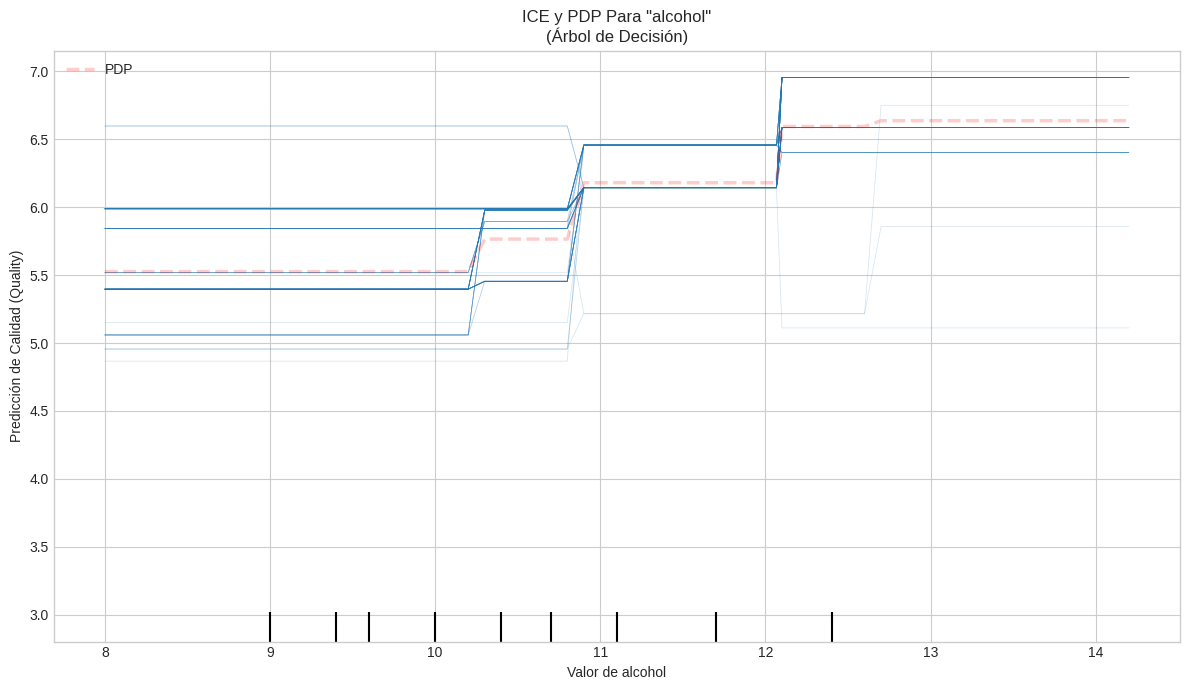

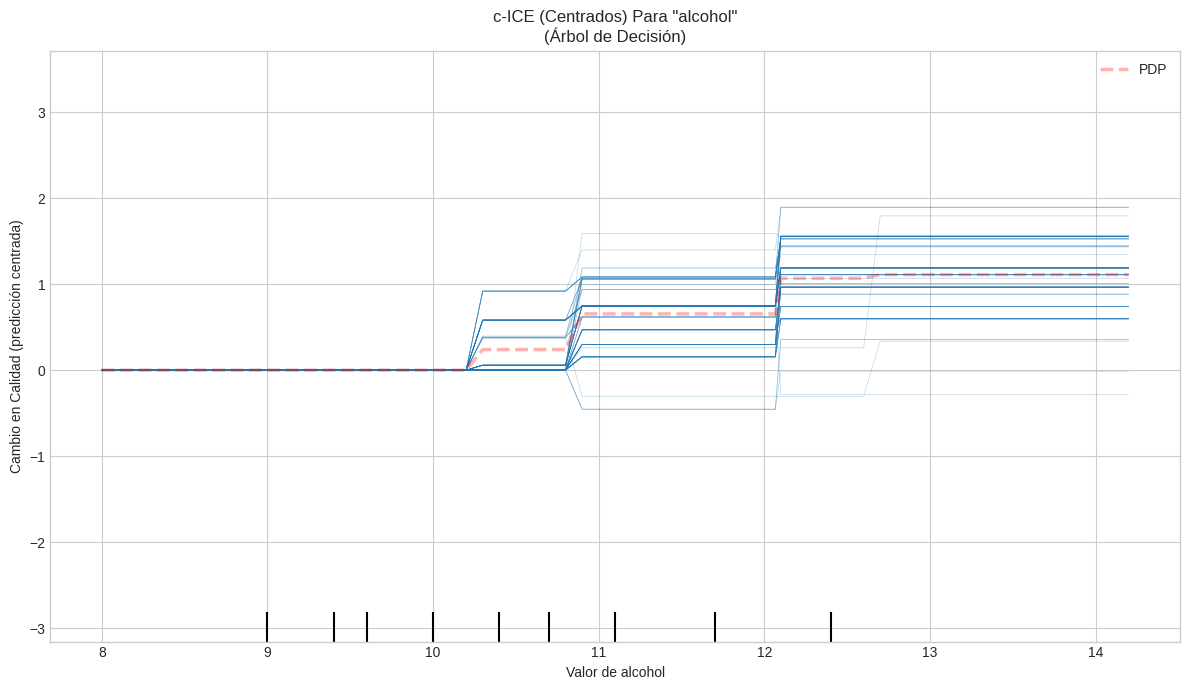


--- Árbol de Decisión: Analizando 'volatile acidity' ---


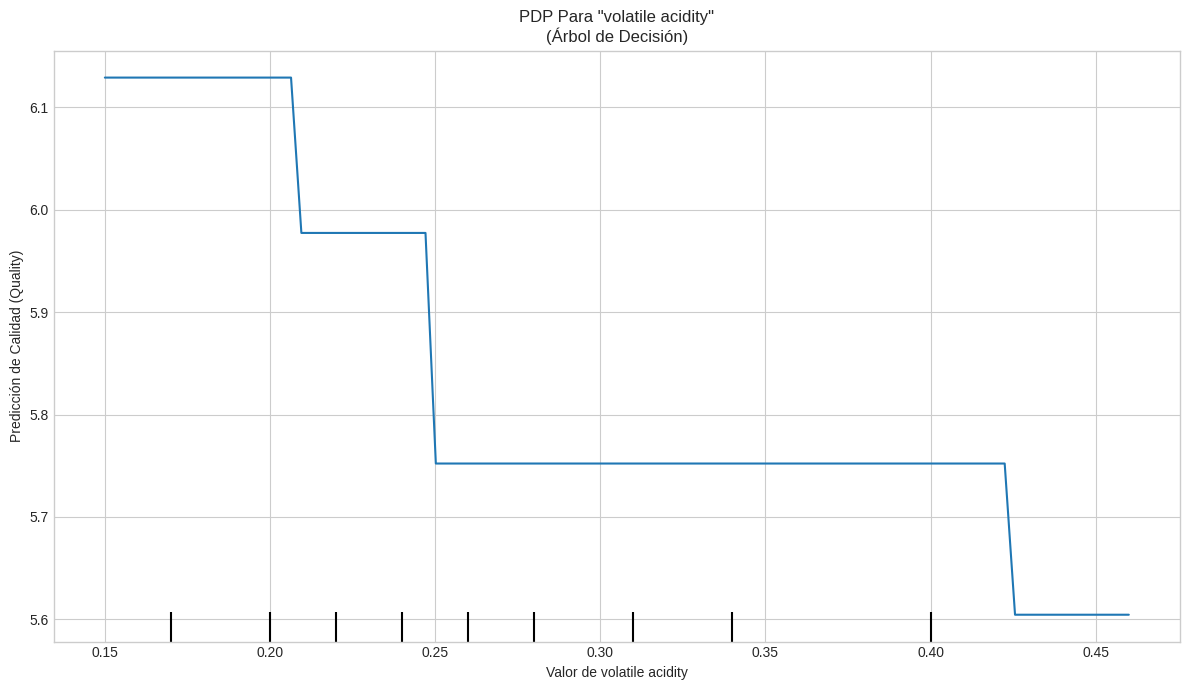

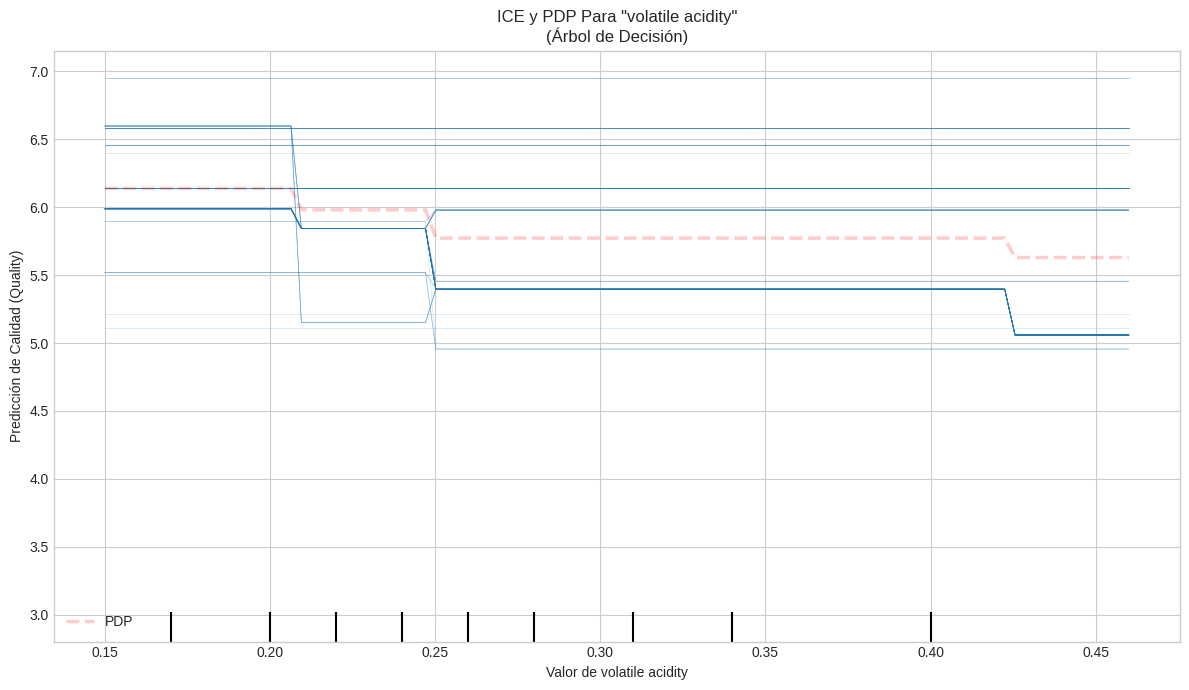

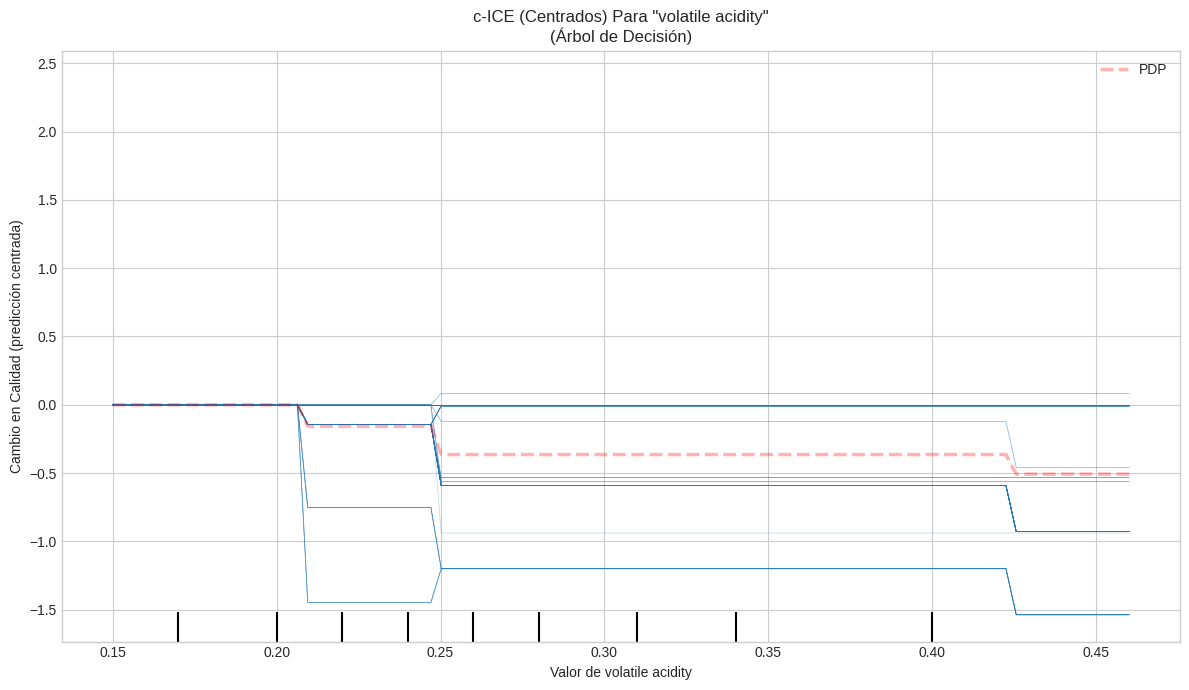


--- Árbol de Decisión: Analizando 'free sulfur dioxide' ---


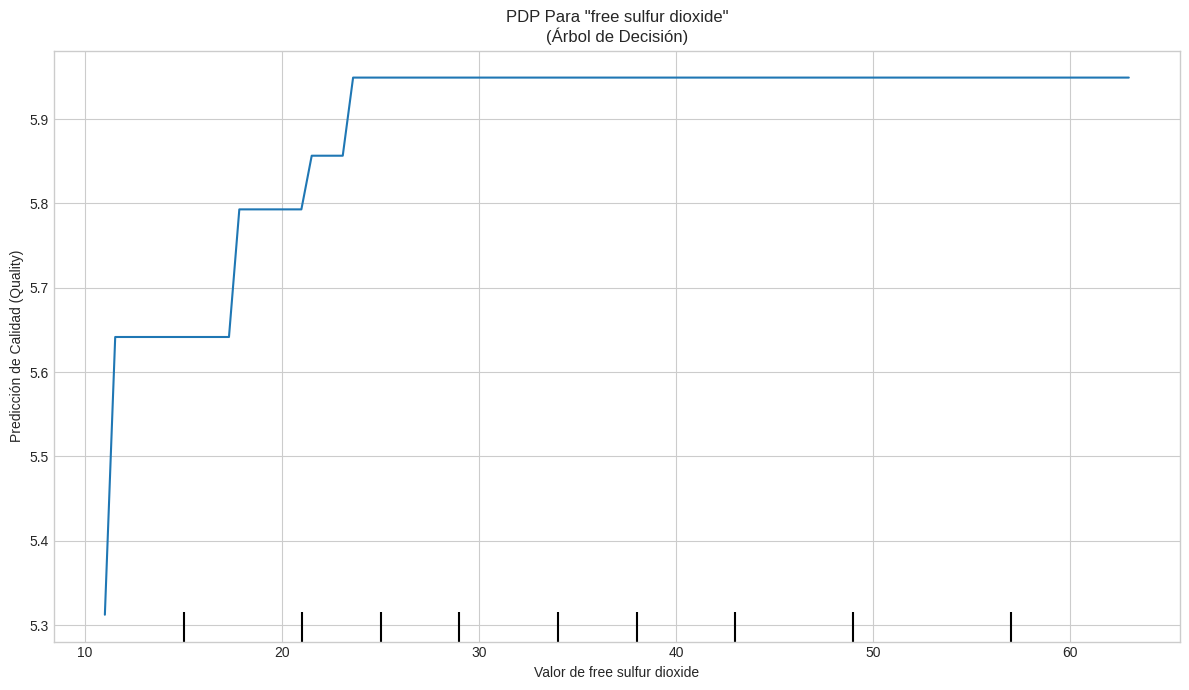

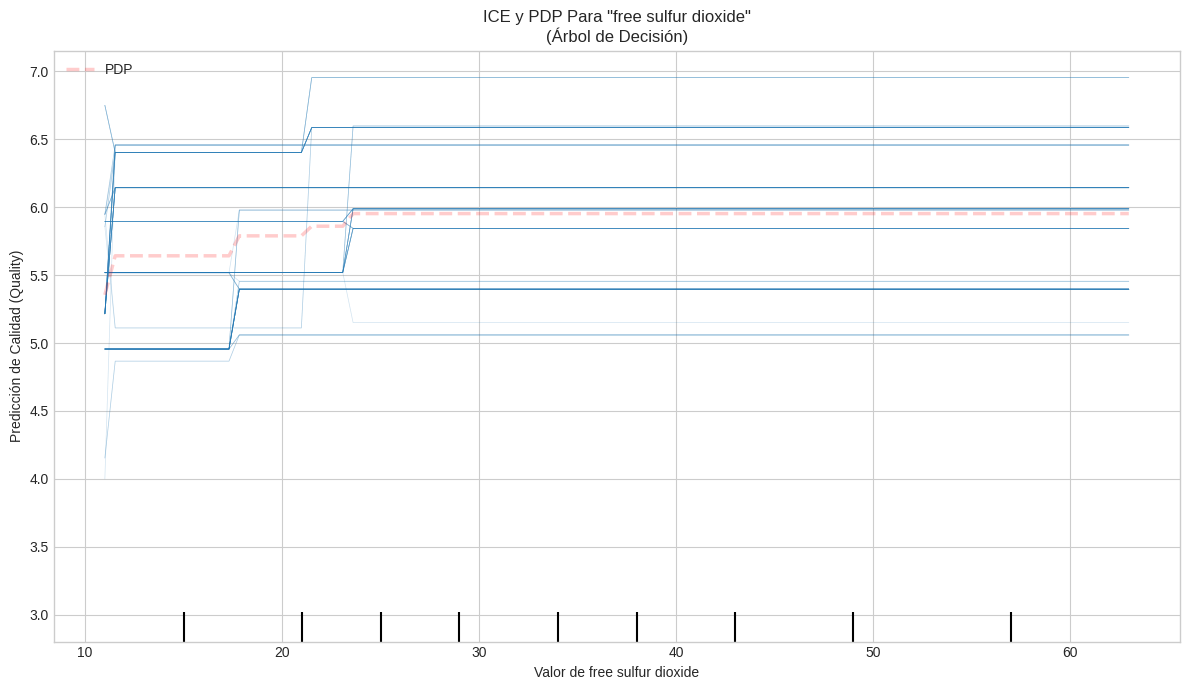

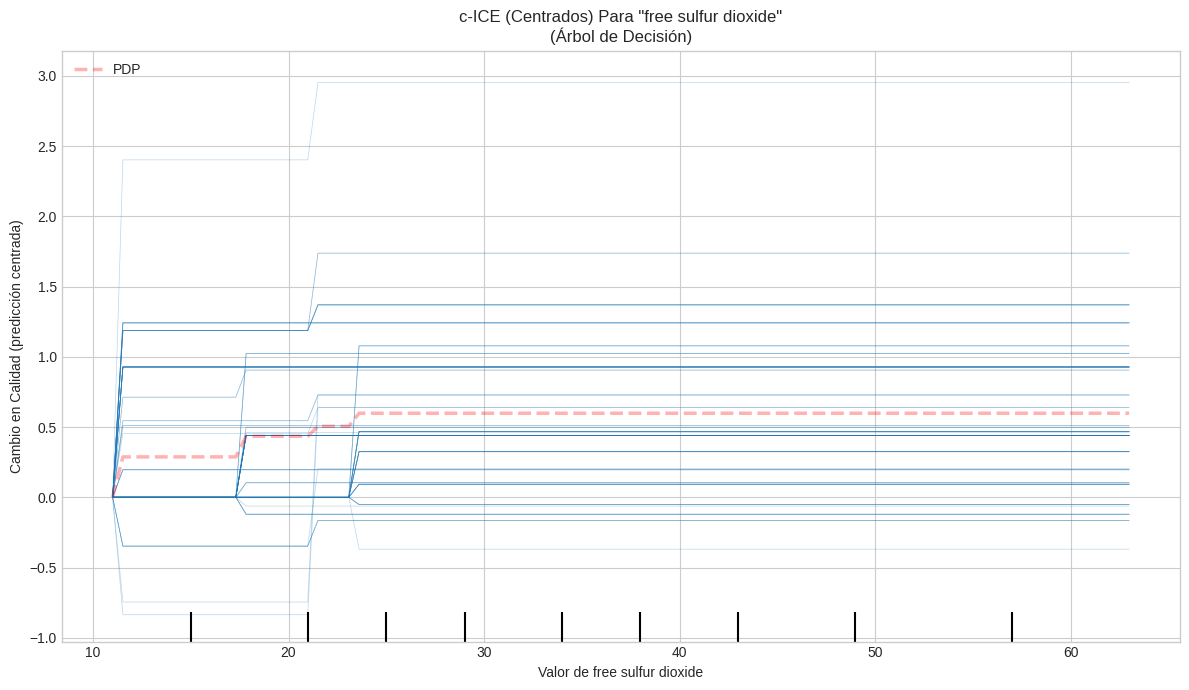


--- Árbol de Decisión: Analizando 'pH' ---


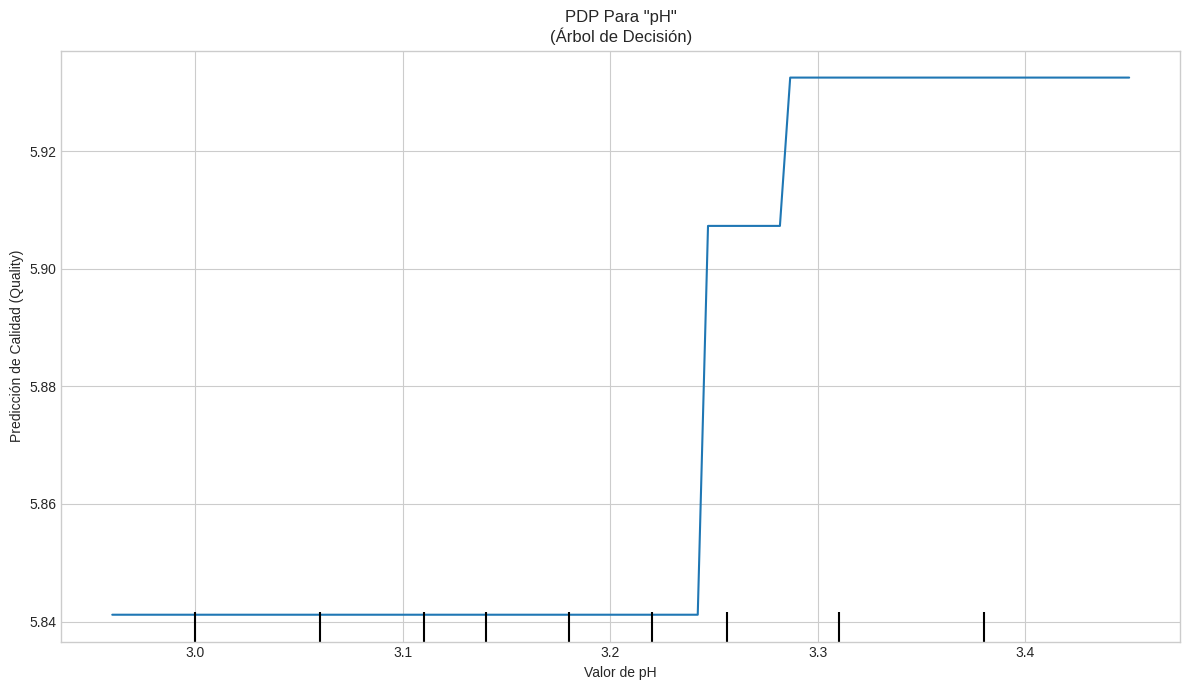

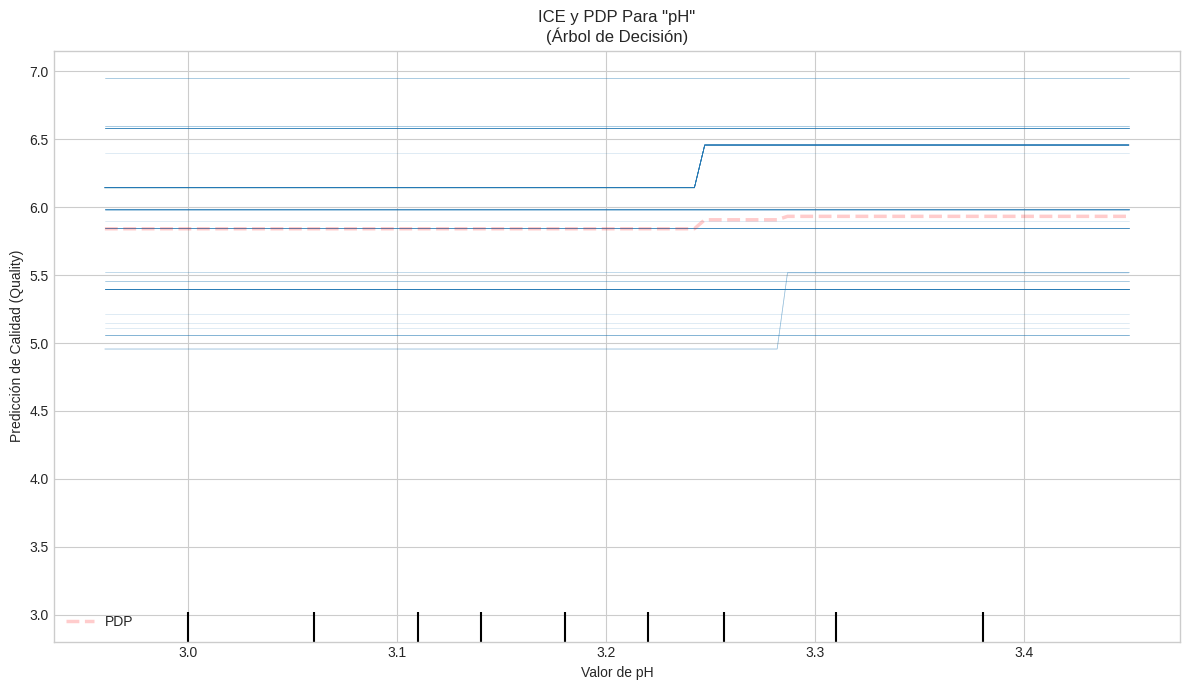

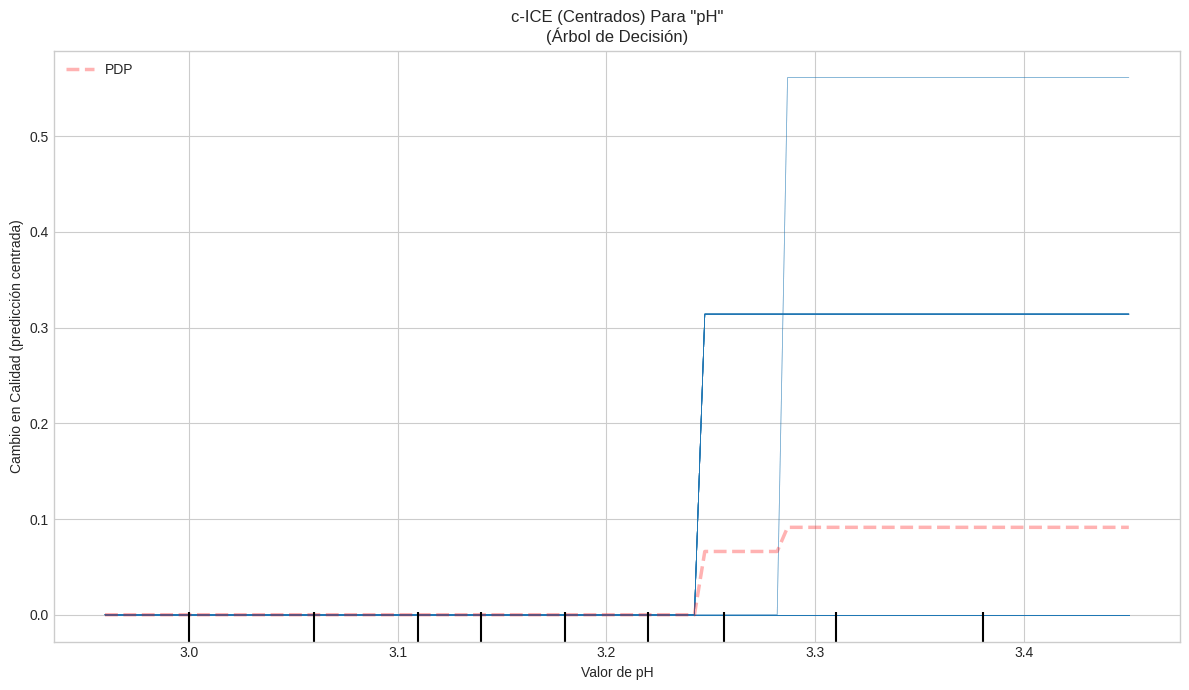


--- Árbol de Decisión: Gráficos PDP 2D para interacciones ---


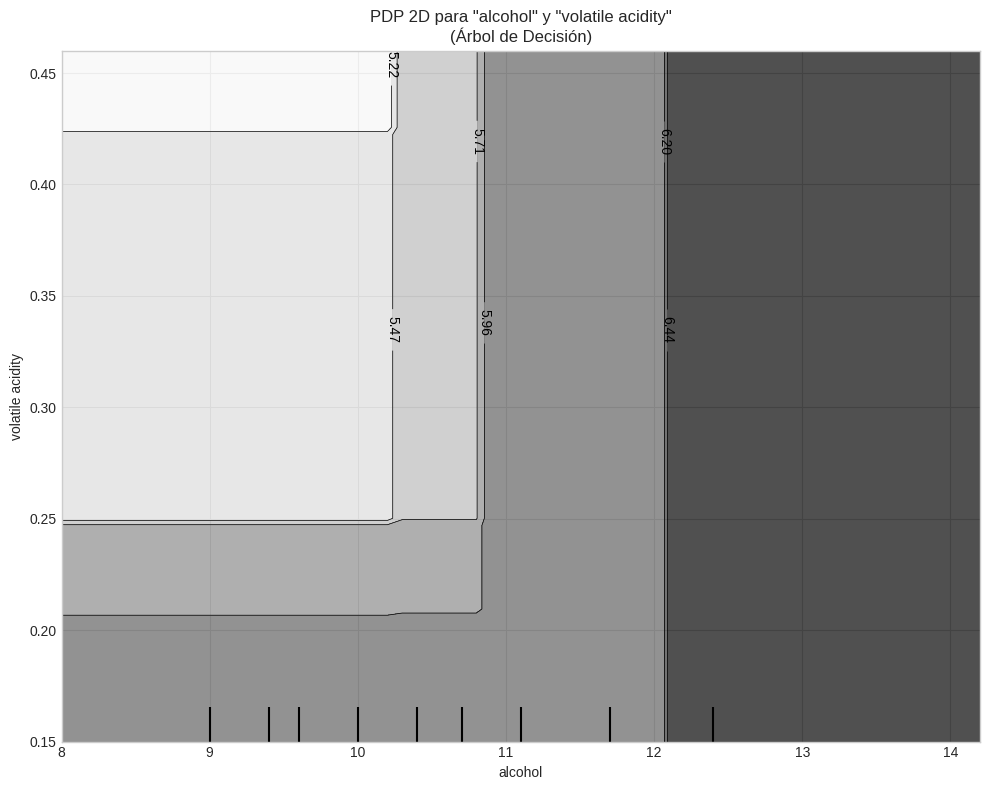

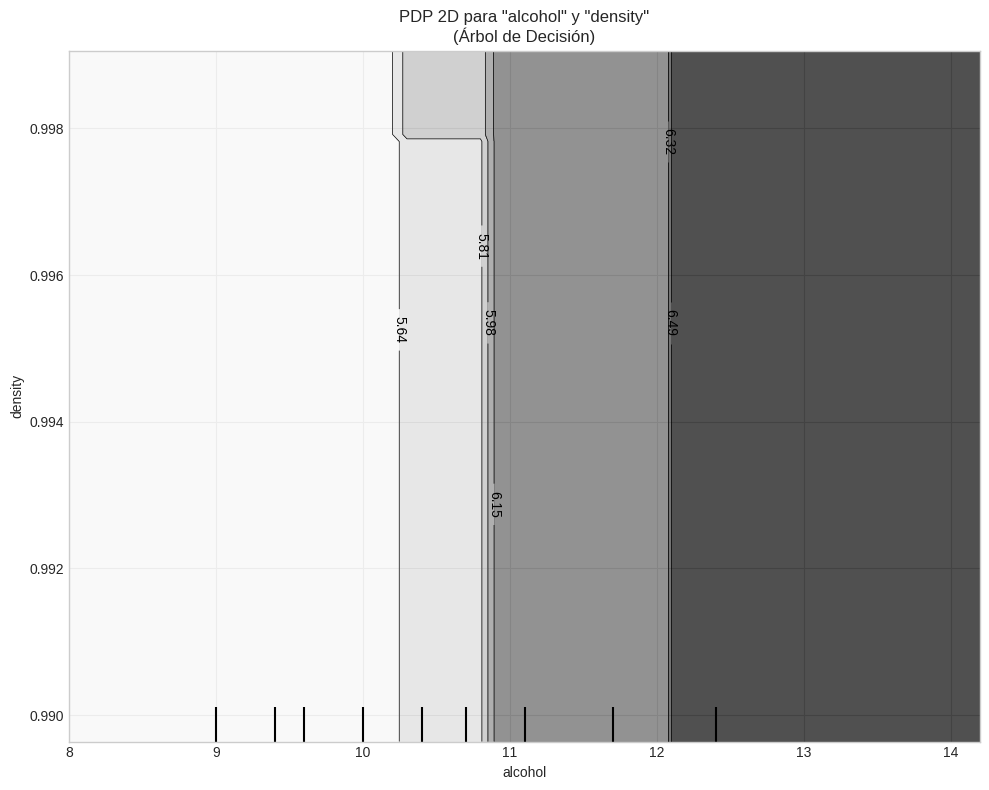

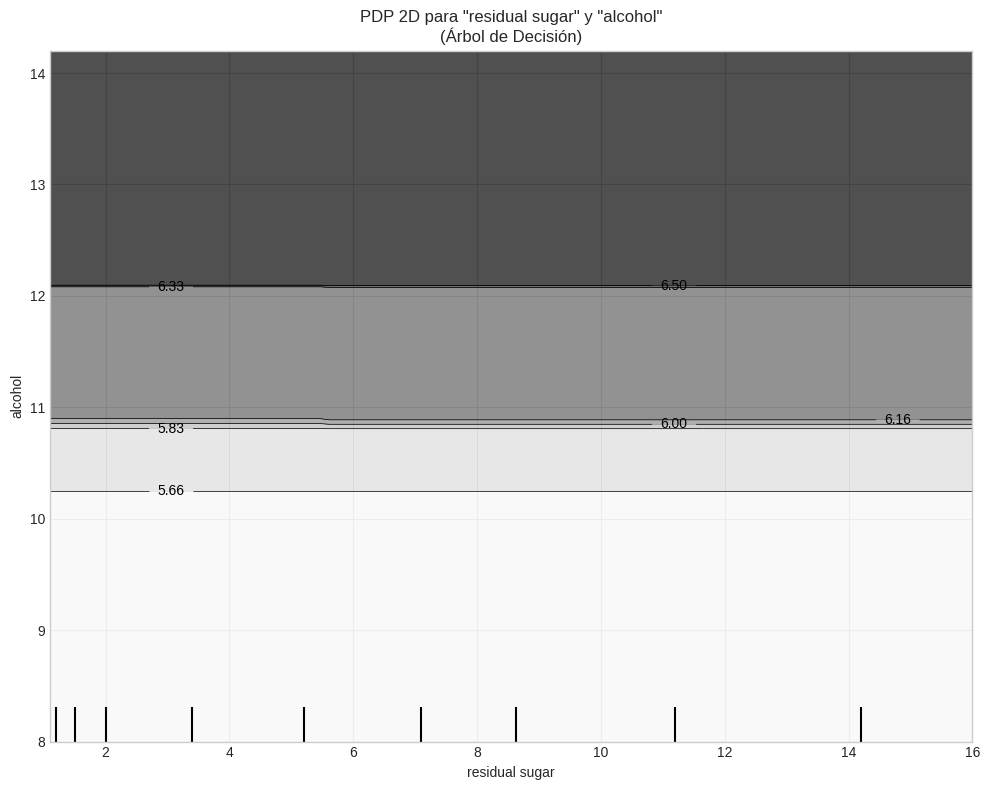

In [51]:

if not df_wine.empty and 'dt_regressor' in locals() and features_for_1D_analysis:
    print("\n" + "="*60 + "\nANÁLISIS PDP/ICE PARA ÁRBOL DE DECISIÓN (Vino Blanco)\n" + "="*60)
    print("Se esperan gráficos PDP/ICE escalonados, reflejando las reglas de división del árbol.")
    for feature in features_for_1D_analysis:
        print(f"\n--- Árbol de Decisión: Analizando '{feature}' ---")
        plot_pdp_ice_cice_wine(dt_regressor, X_train, feature, title_suffix="(Árbol de Decisión)", kind='pdp')
        plot_pdp_ice_cice_wine(dt_regressor, X_train, feature, title_suffix="(Árbol de Decisión)", kind='both') # PDP + ICE
        plot_pdp_ice_cice_wine(dt_regressor, X_train, feature, title_suffix="(Árbol de Decisión)", kind='c-ice')

    print("\n--- Árbol de Decisión: Gráficos PDP 2D para interacciones ---")
    for pair in feature_pairs_for_2D_analysis:
        plot_pdp_2d_wine(dt_regressor, X_train, pair, title_suffix="(Árbol de Decisión)")
else:
    print("Saltando análisis para Árbol de Decisión (datos o modelo no disponibles, o no se seleccionaron características).")


#### --- 7.2 Análisis para el Random Forest ---


ANÁLISIS PDP/ICE PARA RANDOM FOREST (Vino Blanco)
Se esperan gráficos PDP/ICE más suaves, promediando múltiples árboles.

--- Random Forest: Analizando 'alcohol' ---


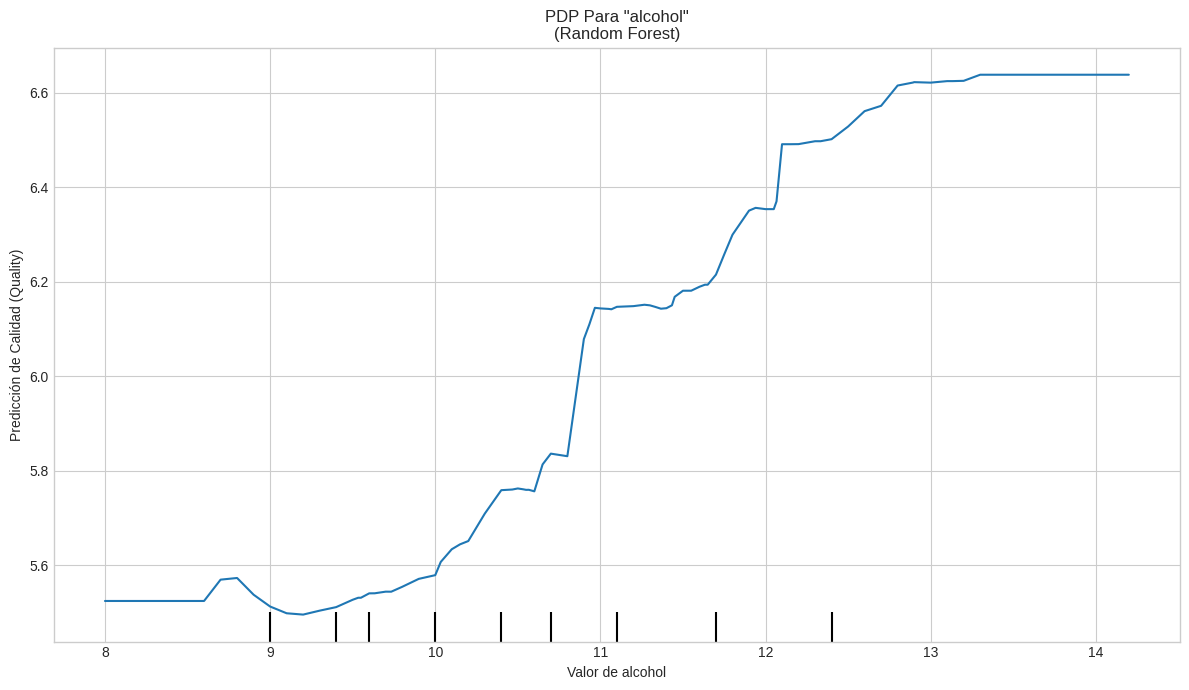

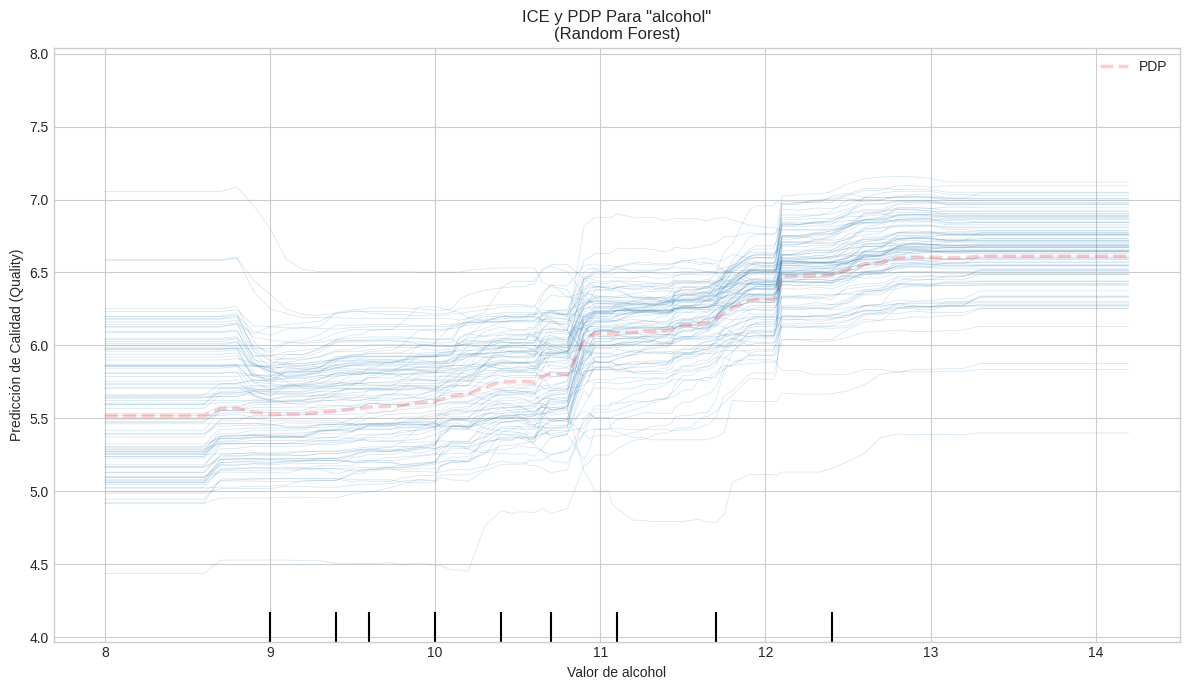

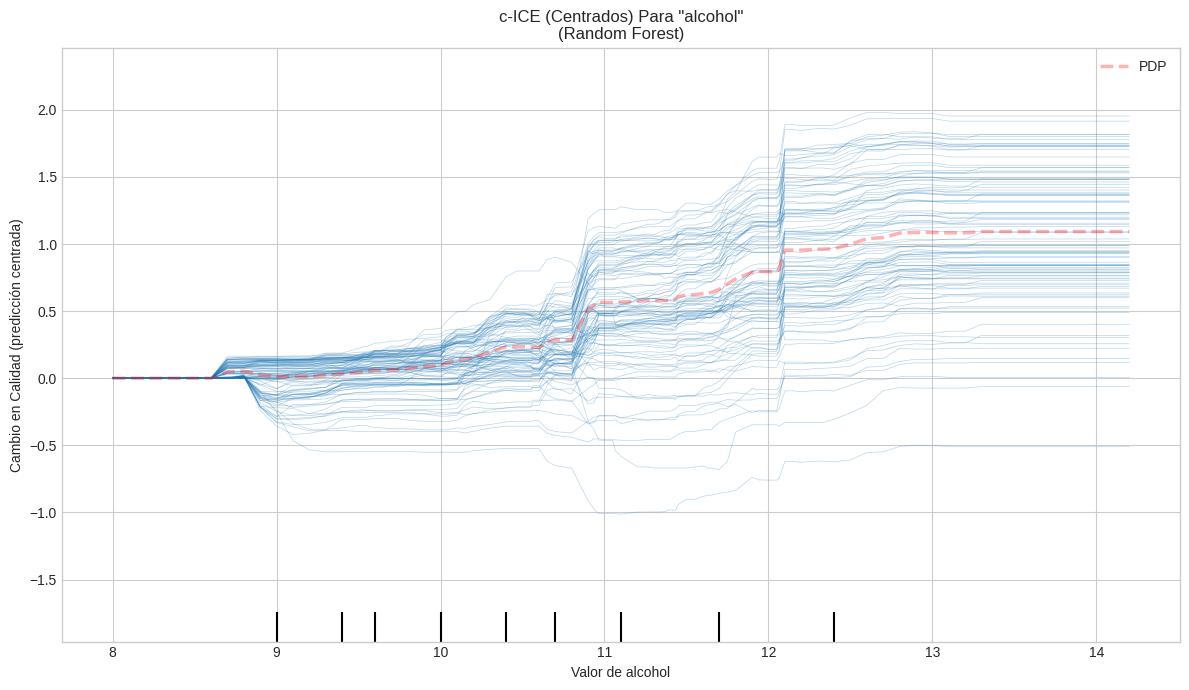


--- Random Forest: Analizando 'volatile acidity' ---


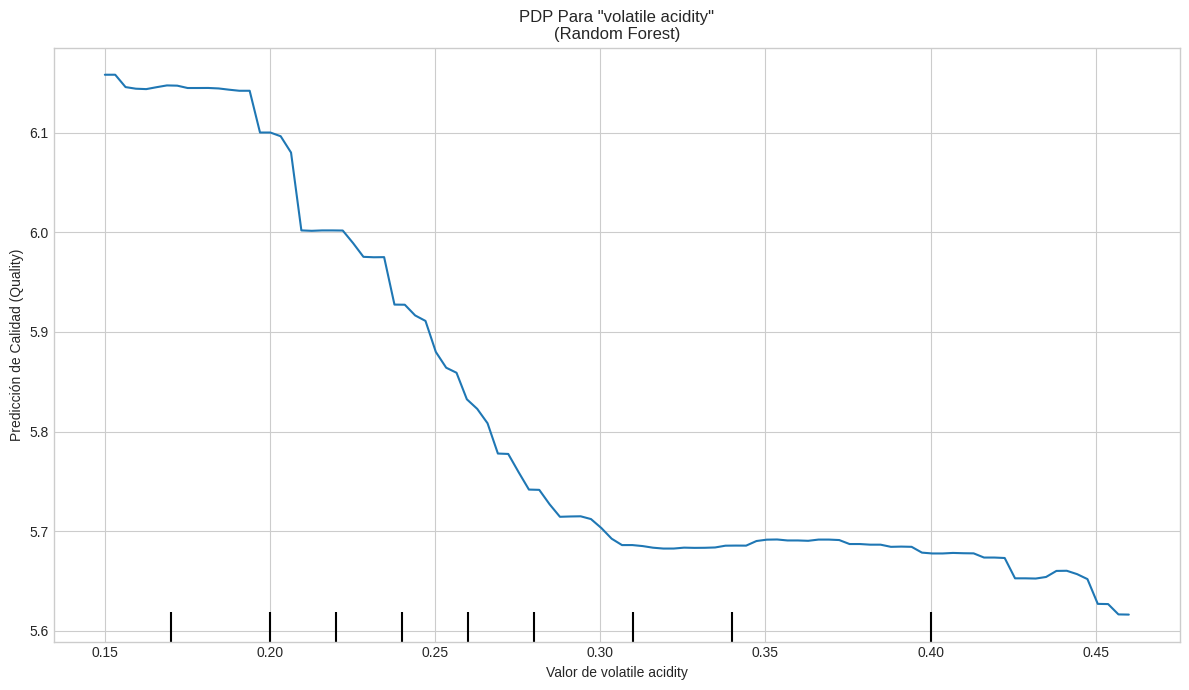

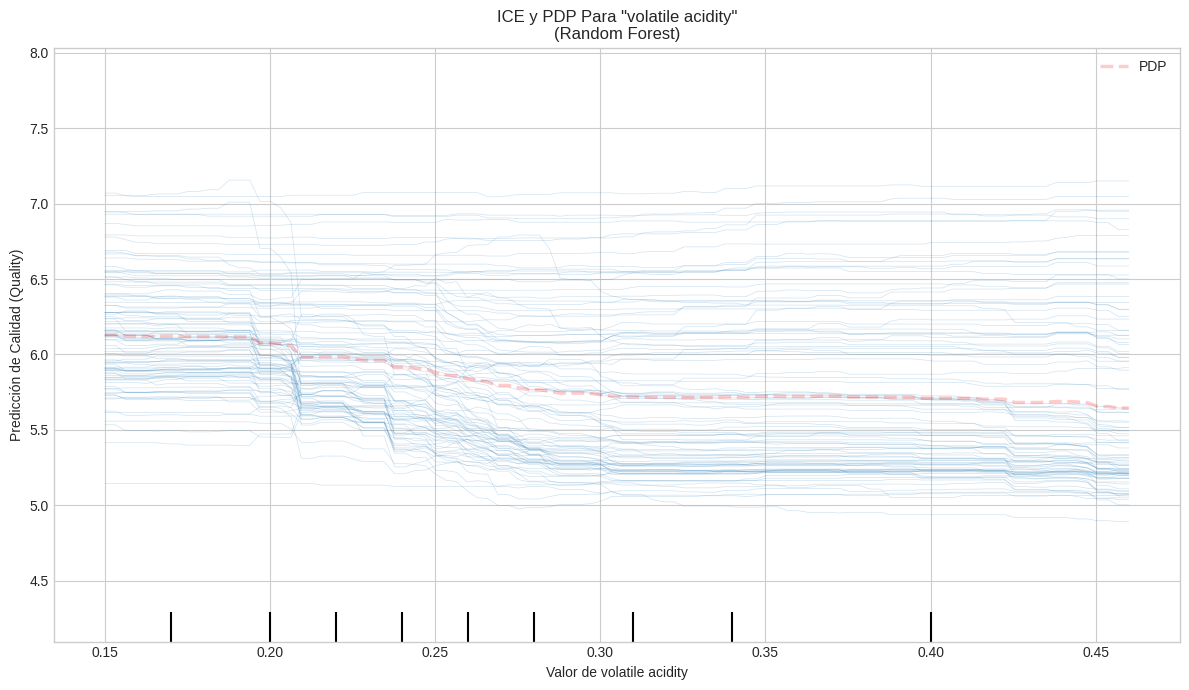

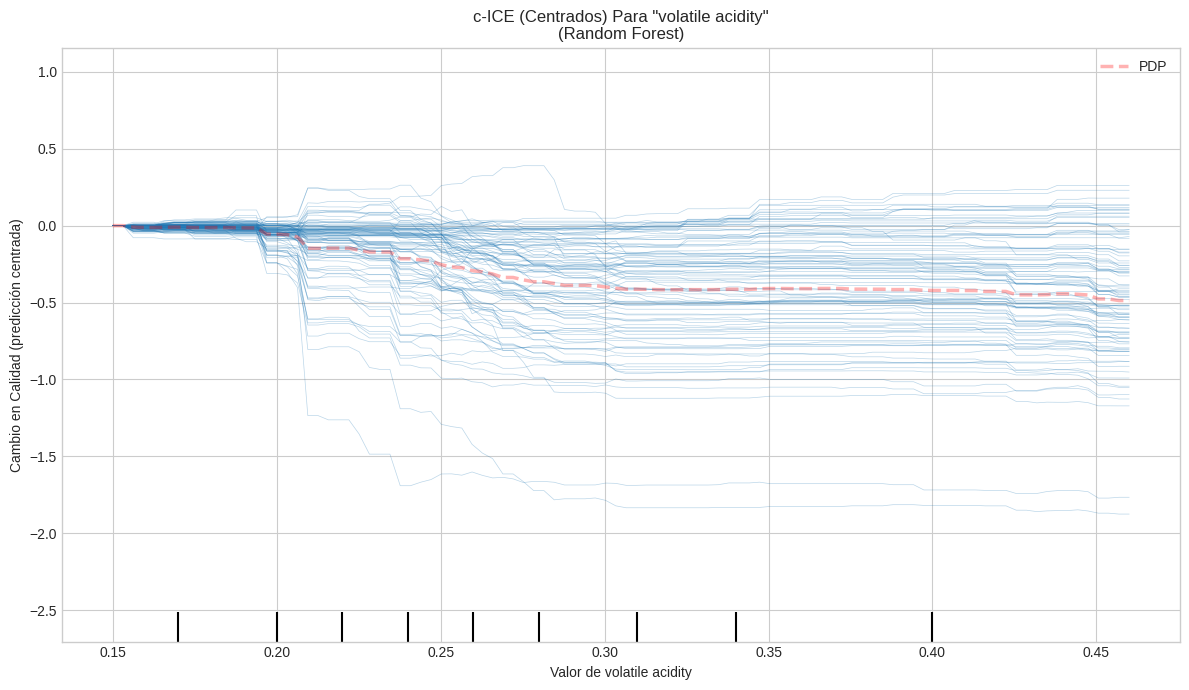


--- Random Forest: Analizando 'free sulfur dioxide' ---


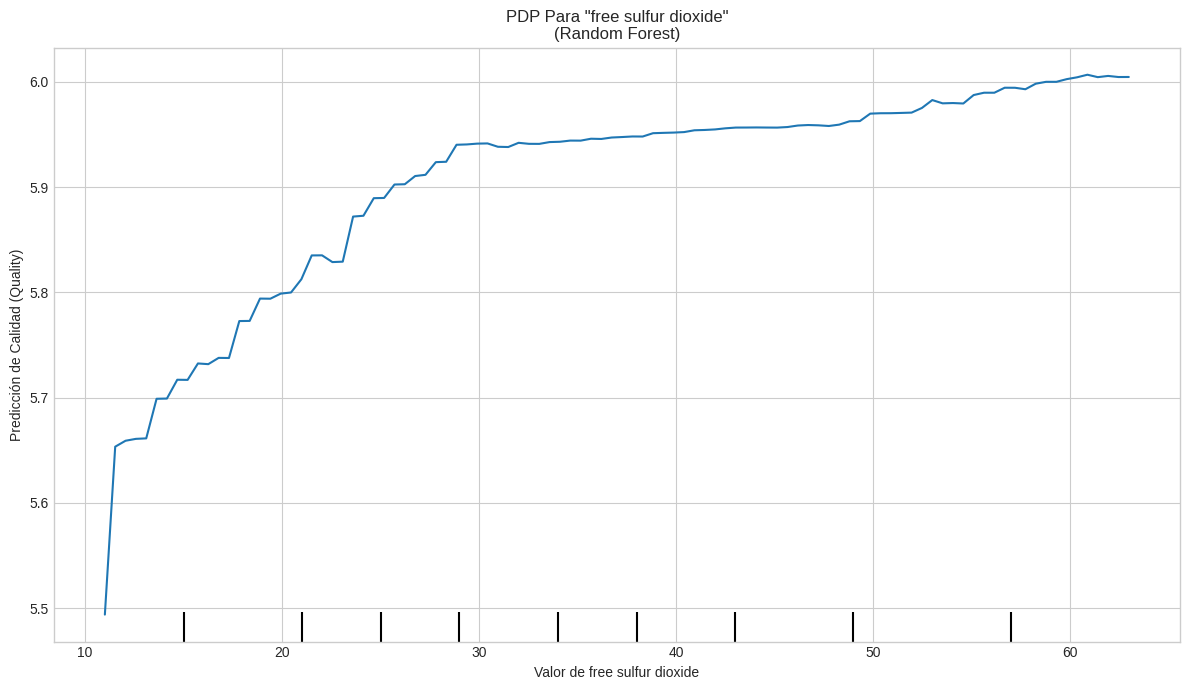

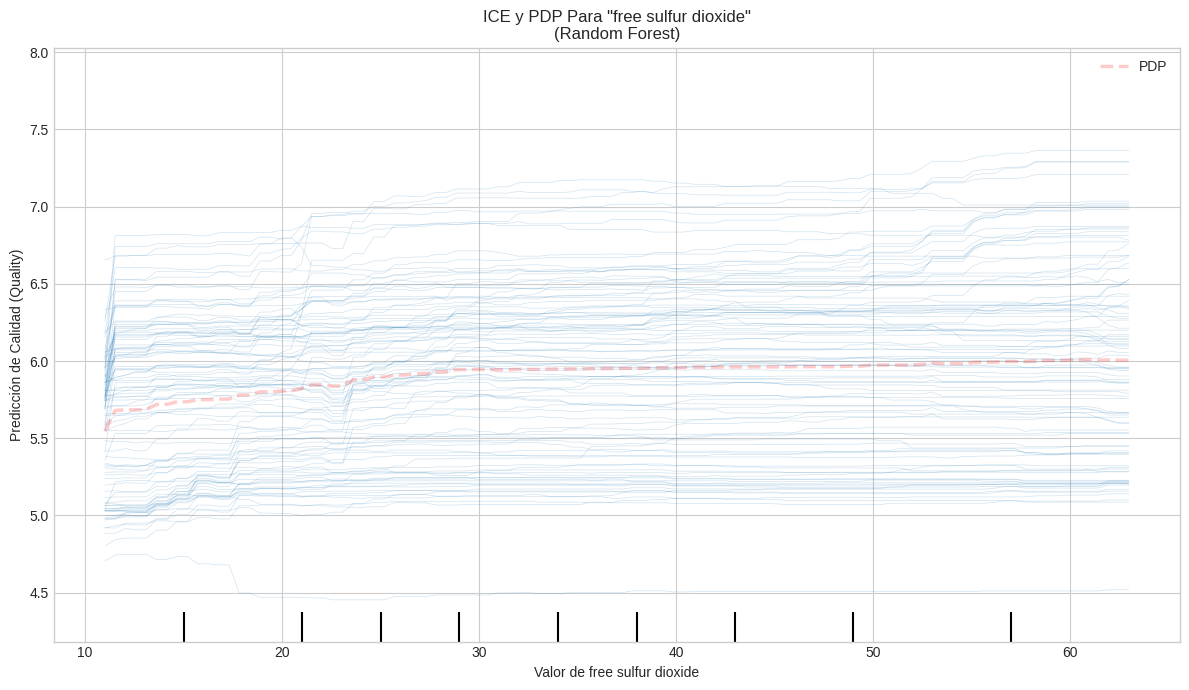

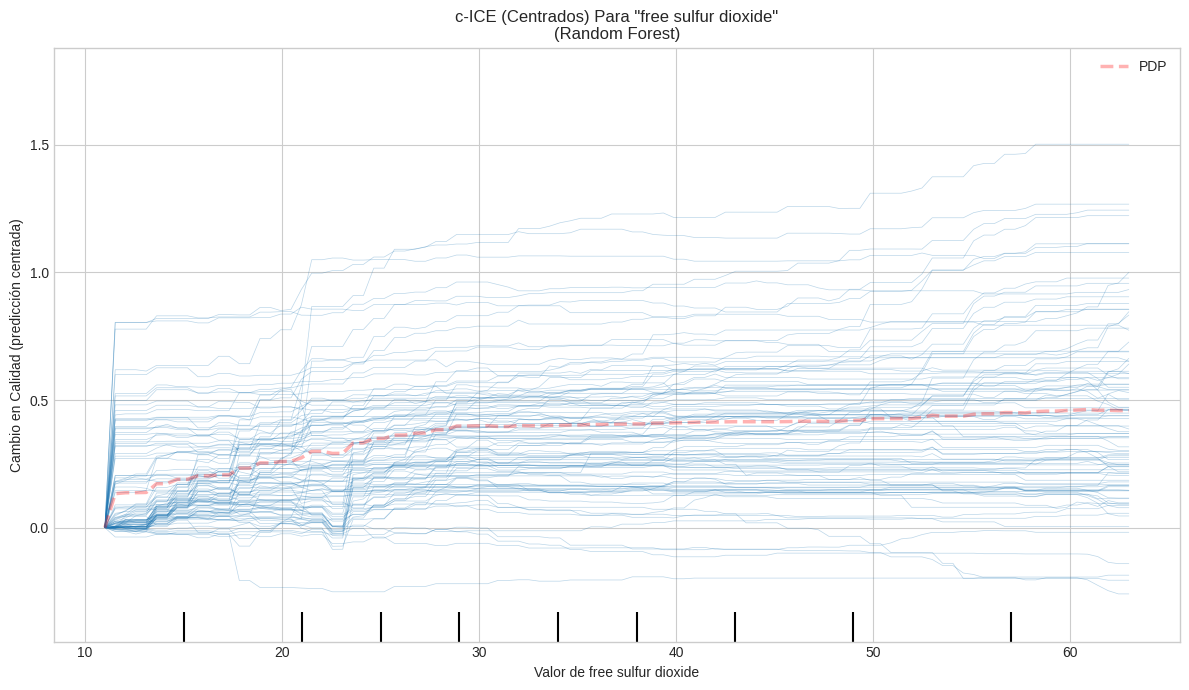


--- Random Forest: Analizando 'pH' ---


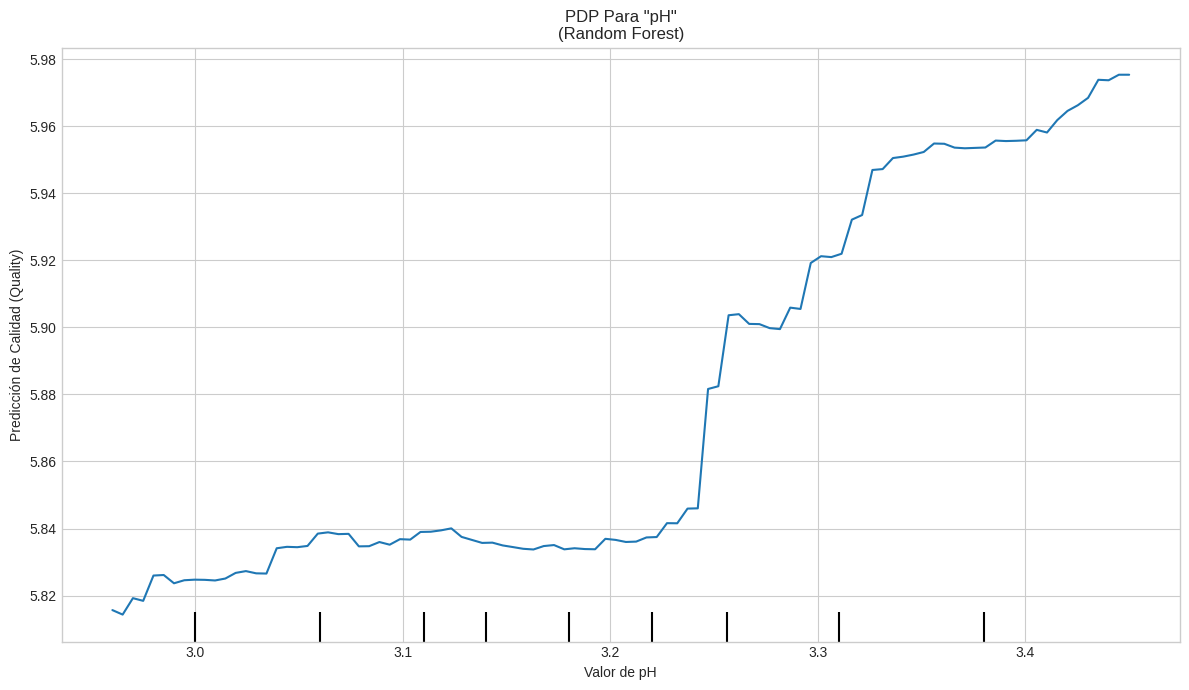

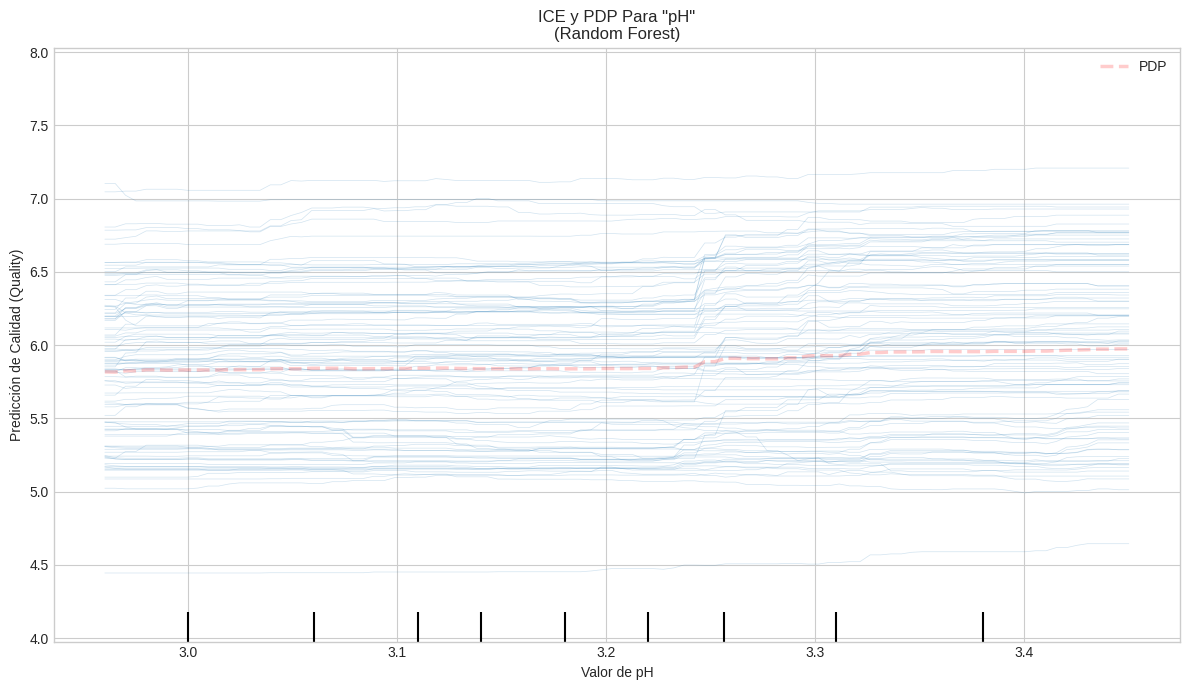

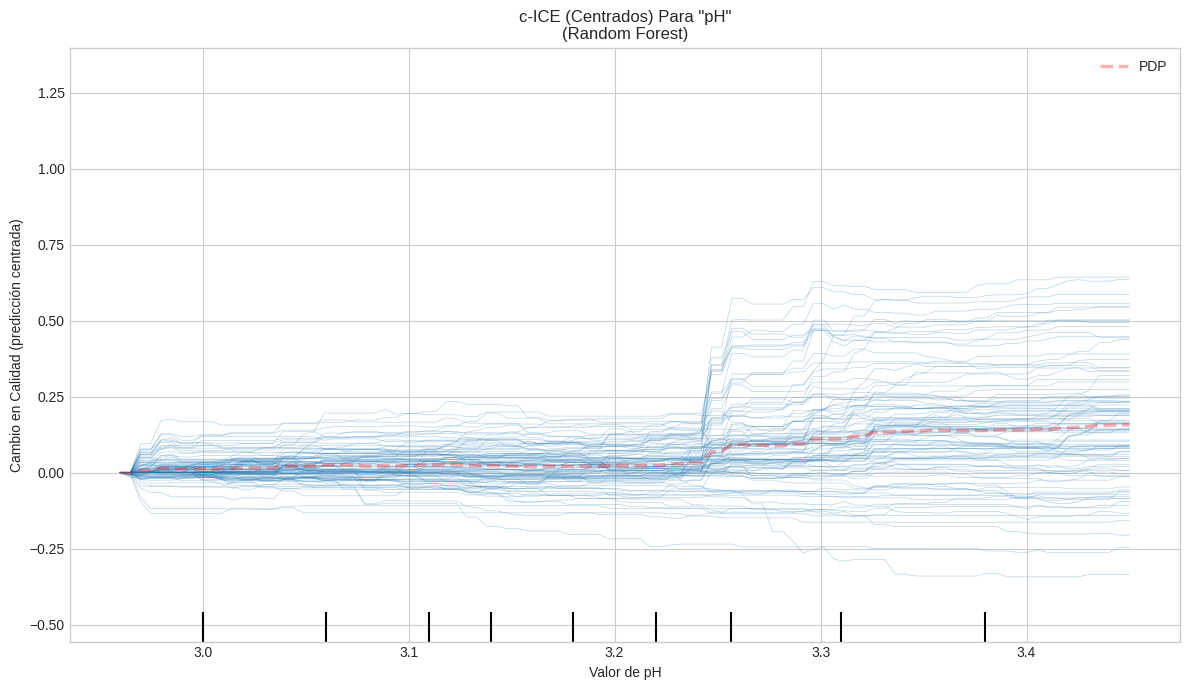


--- Random Forest: Gráficos PDP 2D para interacciones ---


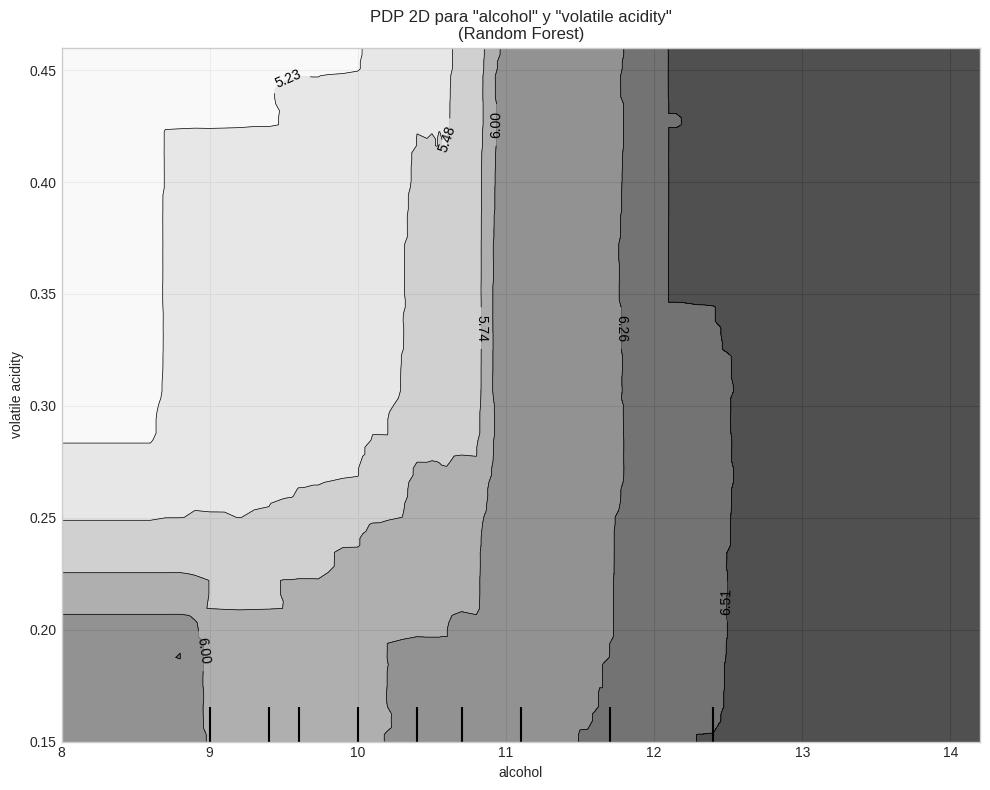

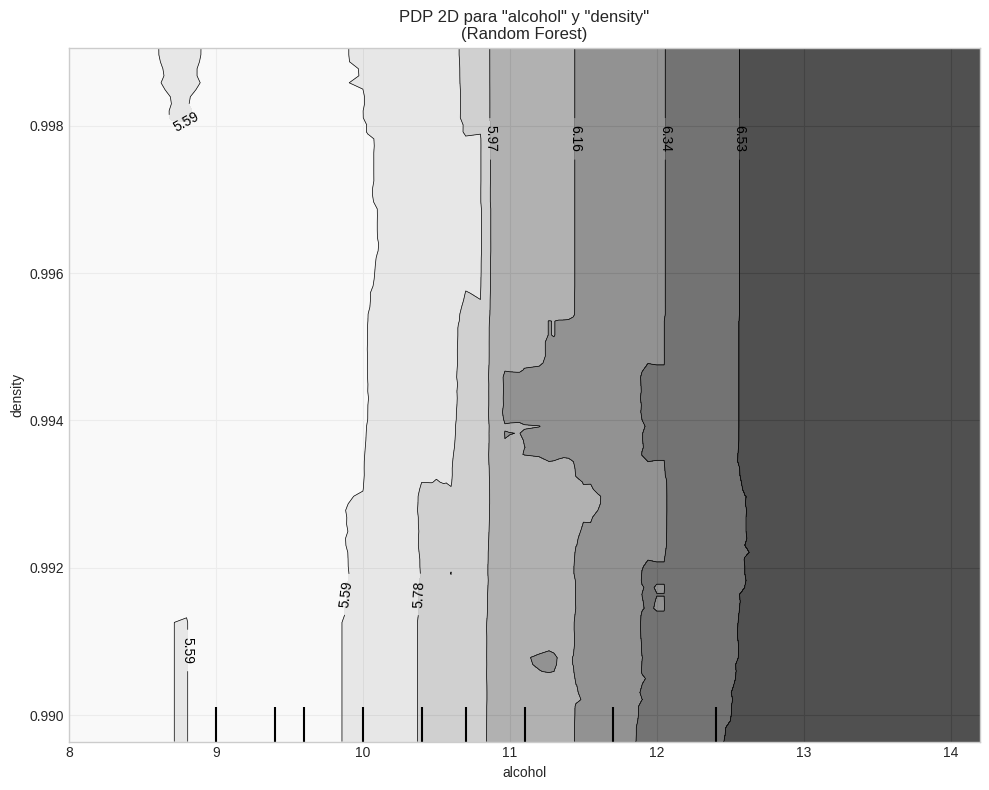

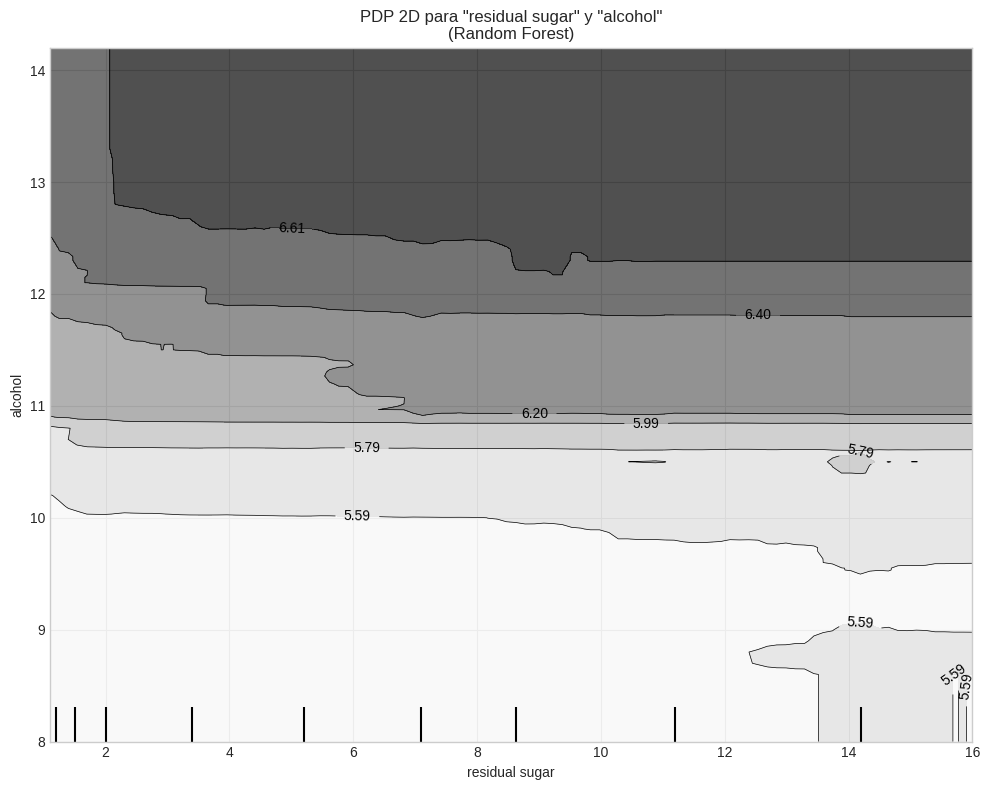

In [52]:
if not df_wine.empty and 'rf_regressor' in locals() and features_for_1D_analysis:
    print("\n" + "="*60 + "\nANÁLISIS PDP/ICE PARA RANDOM FOREST (Vino Blanco)\n" + "="*60)
    print("Se esperan gráficos PDP/ICE más suaves, promediando múltiples árboles.")
    for feature in features_for_1D_analysis:
        print(f"\n--- Random Forest: Analizando '{feature}' ---")
        plot_pdp_ice_cice_wine(rf_regressor, X_train, feature, title_suffix="(Random Forest)", kind='pdp')
        plot_pdp_ice_cice_wine(rf_regressor, X_train, feature, title_suffix="(Random Forest)", kind='both') # PDP + ICE
        plot_pdp_ice_cice_wine(rf_regressor, X_train, feature, title_suffix="(Random Forest)", kind='c-ice')

    print("\n--- Random Forest: Gráficos PDP 2D para interacciones ---")
    for pair in feature_pairs_for_2D_analysis:
        plot_pdp_2d_wine(rf_regressor, X_train, pair, title_suffix="(Random Forest)")
else:
    print("Saltando análisis para Random Forest (datos o modelo no disponibles, o no se seleccionaron características).")